In [125]:
#On importe les library qui nous serons utile pour le notebook

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

import plotly.graph_objects as go 

from sklearn.svm import SVC

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

scaler=StandardScaler()  # creating instance of StandardScaler

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, classification_report


In [26]:
#On importe les DataFrames de vins rouges et de vins blancs 
df_red=pd.read_csv('wine_quality/winequality-red.csv' ,sep=";")
df_white=pd.read_csv('wine_quality/winequality-white.csv', sep=";")

In [36]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
#On vérifie qu'il n'y a aucune donnée manquante dans le premier DataFrame
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [40]:
#On vérifie qu'il n'y a aucune donnée manquante dans le deuxième DataFrame
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Résultat, il n'y a aucune valeur nule dans les datasets


In [38]:
# Afficher le nombre de valeurs uniques avec une barre
print("Red Wine:")
print(df_red.nunique(), end='\n\n')

print("White Wine:")
print(df_white.nunique())

Red Wine:
fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

White Wine:
fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [41]:
# Afficher le nombre de doublons
print("Red Wine:")
print(df_red.duplicated().sum(), end='\n\n')

print("White Wine:")
print(df_white.duplicated().sum())

Red Wine:
240

White Wine:
937


In [43]:
#Vérification des types de données
print("Red Wine :")
print(df_red.info(), end='\n\n')

print("White Wine :")
print(df_white.info())

White Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


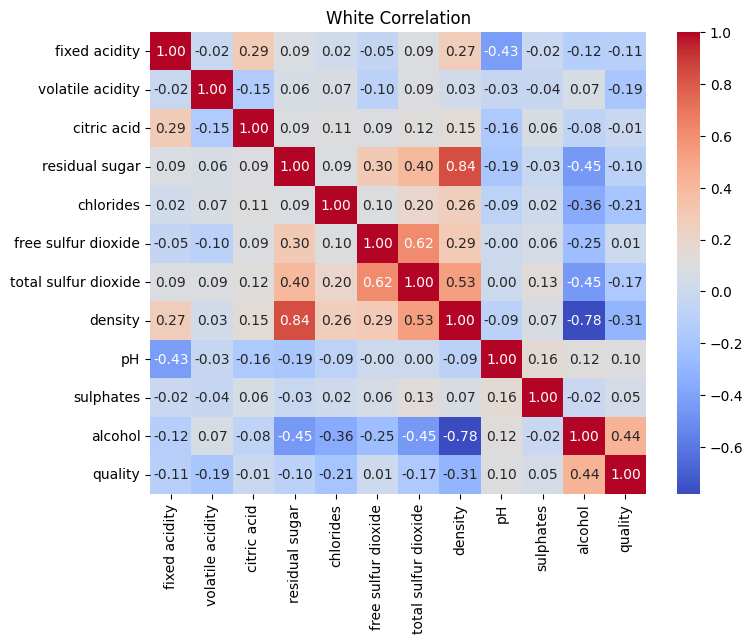

In [50]:
# Fonction pour exclure les colonnes non numériques
def plot_correlation_heatmap(df, title):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_heatmap(df_red, "Red Correlation")
plot_correlation_heatmap(df_white, "White Correlation")



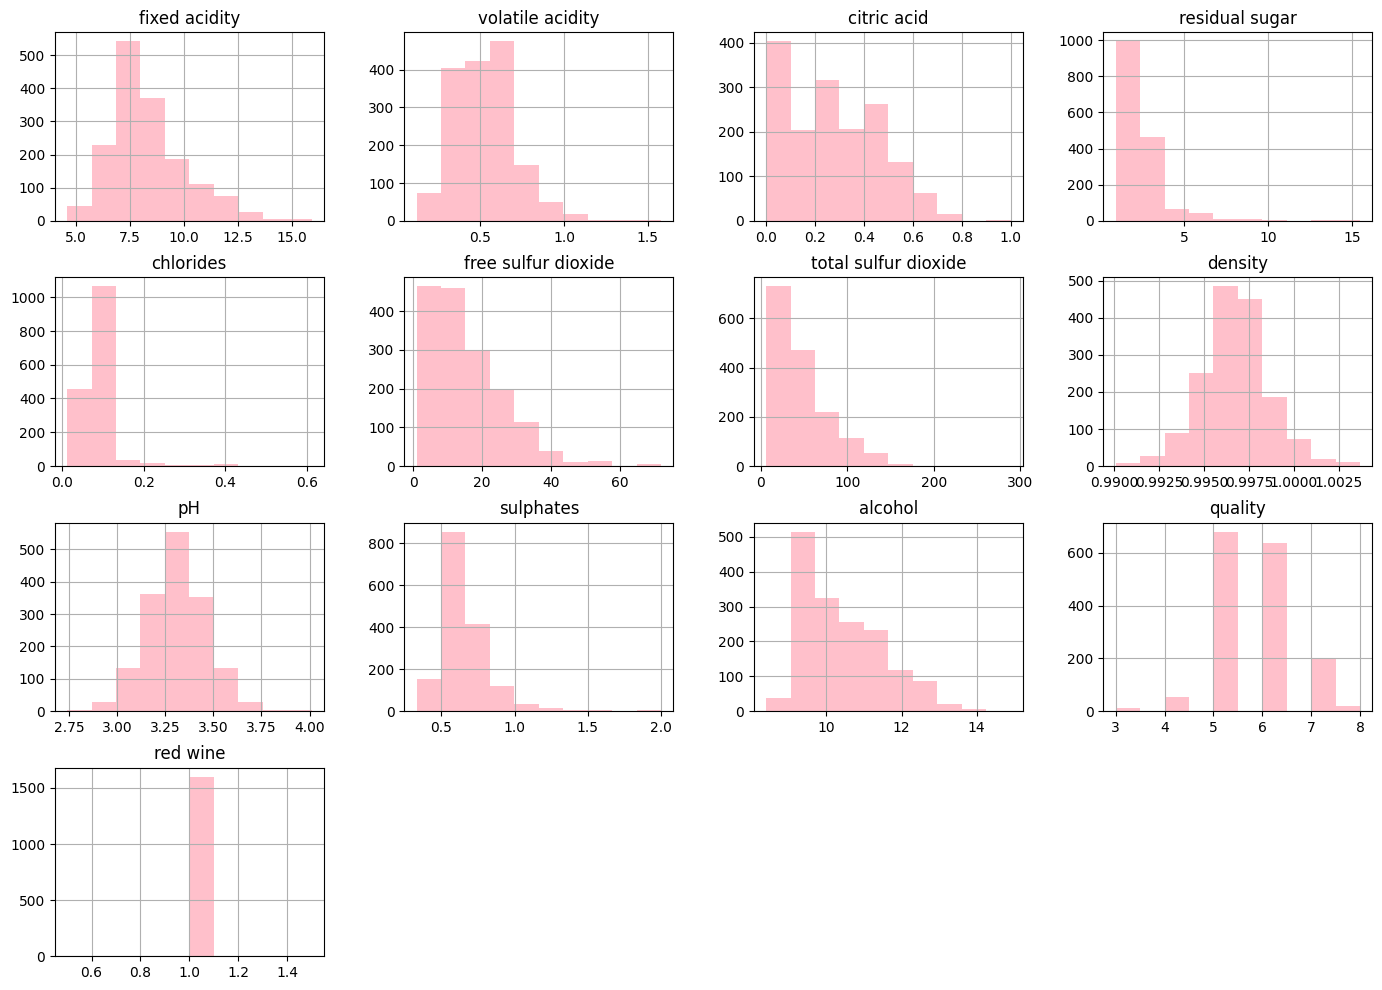

In [100]:
# Cet outil regroupe ces valeurs en catégories et dessine ces catégories sur un graphique, selon leur fréquence (vertical) et les données (horizontal). 
df_red.hist(figsize=(17,12),color='Pink')
plt.show()

In [72]:
# Je crée une nouvelle colonne qui va définir de façon binaire si le vin est rouge ou pas
df_red['red wine'] = 1
df_white['red wine'] = 0

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [74]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [76]:
# Je fusionne les deux DataFrames pour par la suite faire ...
merged_df = pd.concat([df_red, df_white], axis=0)

merged_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


Nous voyons bien que le nombre de lignes du nouveau dataframe correspond bien au nombre de lignes cumulées des deux dataframes de base.

In [81]:
# nous assignons le dataset sans la colonne indiquant la couleur du vin a un premier dataframe
X_merged_df = merged_df.iloc[:,:-1]
# nous assignons ensuite uniqement la colonne stipulant de la couleur du vin dans un deuxième dataframe
Y_merged_df = merged_df['red wine']


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_merged_df, Y_merged_df, random_state=42, test_size=0.2)

In [88]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
317,6.6,0.240,0.35,7.70,0.031,36.0,135.0,0.99380,3.19,0.37,10.5,5
947,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7
877,7.7,0.715,0.01,2.10,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6
1328,5.2,0.370,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6
4464,6.6,0.260,0.56,15.40,0.053,32.0,141.0,0.99810,3.11,0.49,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
3592,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
3627,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
3791,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


In [91]:
scaler_X_train = scaler.fit_transform(X_train)

scaler_X_train

array([[-0.46822898, -0.59951186,  0.20546655, ..., -1.0832659 ,
         0.01376574, -0.92920628],
       [ 0.85149992, -0.35284877,  1.10406349, ...,  0.59857677,
         1.60871671,  1.35243087],
       [ 0.38571325,  2.32961232, -2.14471006, ...,  0.26220824,
         1.10504798,  0.2116123 ],
       ...,
       [-0.62349121,  0.20214318, -0.83137607, ..., -0.67962366,
        -0.82568214, -0.92920628],
       [-0.54586009, -0.47618032,  1.24230917, ..., -0.41052883,
        -0.82568214, -0.92920628],
       [-0.00244231,  1.74378748, -1.79909585, ...,  0.06038712,
        -0.82568214, -0.92920628]])

In [92]:
scaler_X_test = scaler.fit_transform(X_test)

scaler_X_test

array([[-0.19881797, -1.03269521,  2.89842878, ..., -1.01918451,
         1.39911755,  2.52057894],
       [ 0.32850455,  1.6721092 , -0.6913277 , ..., -0.55058209,
        -0.52157659, -0.97027968],
       [-0.34948155,  0.23338345,  0.1891786 , ..., -0.6175253 ,
         1.23210067,  1.3569594 ],
       ...,
       [-0.50014513, -1.09024424,  0.25690986, ...,  1.45771398,
         1.56613443,  1.3569594 ],
       [-0.50014513,  0.23338345,  0.46010362, ...,  0.25273634,
        -0.9391188 ,  0.19333986],
       [ 0.10250918, -1.09024424, -0.28494018, ..., -0.6844685 ,
        -1.52367788,  1.3569594 ]])

In [94]:
X_train.shape

(5197, 12)

In [119]:
#On va maintenant entrainer notre modèle SVM
svm_model = SVC(random_state=42)

svm_model.fit(scaler_X_train, Y_train)

SVC(random_state=42)

# Travail avec le modèle SVM

In [120]:
svc_predictions = svm_model.predict(scaler_X_test)

pd.DataFrame(svc_predictions)

,0
0,0
1,1
2,0
3,0
4,0
...,...
1295,1
1296,0
1297,0
1298,0


In [129]:
#Affichage des performances du modèle
a = accuracy_score(Y_test,svc_predictions)
p = precision_score(Y_test,svc_predictions)
r = recall_score(Y_test,svc_predictions)

print('Accuracy:',a*100)
print('Precision:',p*100)
print('Recall:',r*100)

Accuracy: 99.46153846153845
Precision: 99.70238095238095
Recall: 98.24046920821115


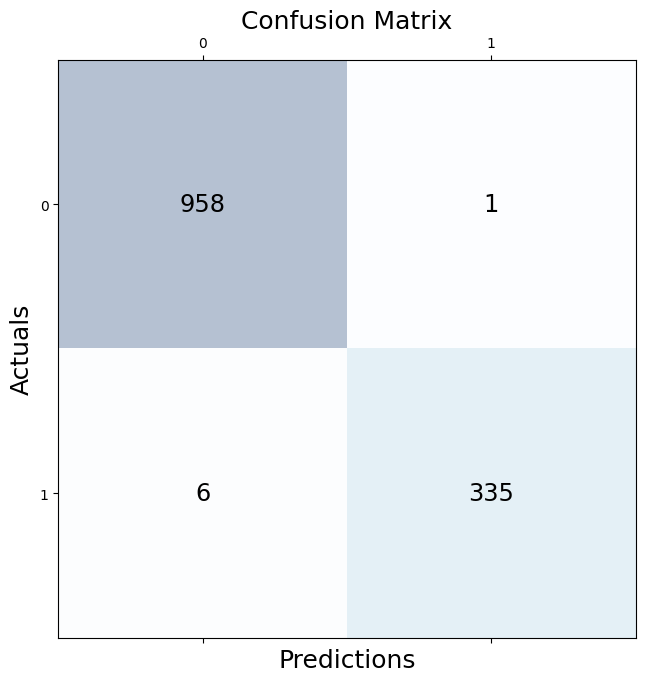

In [122]:
c=confusion_matrix(Y_test,svc_predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Sur le graphique nous voyons également qu'on a eu sur le dataframe de test : 
Vrais positifs (TP) : 335 
Vrais négatifs (TN) : 958 
Faux positifs (FP) : 1 
Faux négatifs (FN) : 6 

In [115]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def model_evaluator(model_trained):
  temp_y_train_hat = model_trained.predict(X_train)
  print("MAE : ", mean_absolute_error(Y_train, temp_y_train_hat))
  print("MSE : ", mean_squared_error(Y_train, temp_y_train_hat))
  print("MAPE : ", mean_absolute_percentage_error(Y_train, temp_y_train_hat))

In [123]:
model_evaluator(svm_model)

C:\Users\Jawad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names



MAE :  0.24206272849720992
MSE :  0.24206272849720992
MAPE :  0.24206272849720992
